In [4]:
#Read a database sdf file

from rdkit import Chem
from rdkit.Chem import SDMolSupplier
import pandas as pd

import os, requests
path = '/Users/carlafeliu/Docs/Master/TFM/github'
sdffile='Download_SDF_Covalent_Cysteine_Library_39301.sdf'
localsdffile = os.path.join(path, sdffile)
if not os.path.exists(localsdffile):
    url = 'https://www.chemdiv.com/catalog/focused-and-targeted-libraries/cysteine-targeted-covalent-library/'+sdffile
    response = requests.get(url)
    with open(localsdffile, 'wb') as f:
        f.write(response.content)
        

database = Chem.SDMolSupplier('../../../Download_SDF_Covalent_Cysteine_Library_39301.sdf')

#Repassar el codi ja que no em baixa la base de dades igual que quan ho faig manualment i per tant el codi de després no funciona.



In [5]:
#Create a dataframe
from rdkit import Chem
from rdkit.Chem import Crippen, Descriptors
#from rdkit_forchemprop import features (tenim aquesta funció en un altre document, mirar que hi passa)

def features(mol,data):
    #Extract properties using RDKit functions
    mol_name = mol.GetProp('Name')
    smiles = Chem.MolToSmiles(mol)
    formula = Chem.rdMolDescriptors.CalcMolFormula(mol)
    mw= Chem.rdMolDescriptors.CalcExactMolWt(mol)
    logp= Crippen.MolLogP(mol)
    num_hbd = Chem.rdMolDescriptors.CalcNumHBD(mol)
    num_hba = Chem.rdMolDescriptors.CalcNumHBA(mol)
    tpsa = Chem.rdMolDescriptors.CalcTPSA(mol)
    num_rb = Chem.rdMolDescriptors.CalcNumRotatableBonds(mol)

    #Append results in a data list
    data.append([smiles,mol_name,formula,mw,logp,num_hbd,num_hba,tpsa, num_rb])
    return

data = [ ]

for mol in database:
    features(mol,data)

#We have a list with information. Creation of a Dataframe:
df= pd.DataFrame(data,columns=['SMILES','Name','Formula','MW','logP',"H-bond donor","H-bond acceptor","TPSA","Rotatable bonds"])

In [6]:
#Print information about database
print(df.head(10))

                                              SMILES  \
0                               C(#Cc1cccs1)c1ccccc1   
1            c1ccc(C2=NC(c3ccccc3)N3C2C3c2ccccc2)cc1   
2  C(#Cc1ccc(C2Nc3ccccc3C(c3ccccc3)(c3ccccc3)O2)o...   
3                         C(#Cc1csc2ccccc12)c1ccccc1   
4  C(#Cc1cccc(-c2nc3ccccc3nc2-c2cccc(C#Cc3ccc(Sc4...   
5  C(#Cc1cccc(-c2nc3ccccc3nc2-c2cccc(C#Cc3ccc(Oc4...   
6                              C(#Cc1ccccc1)c1ccccc1   
7            C(#Cc1cc(C#Cc2ccccc2)c2nonc2c1)c1ccccc1   
8                 C(#Cc1ccc2c(c1)sc1ccccc12)c1ccccc1   
9              C(#Cc1ccc2noc(-c3ccccc3)c2c1)c1ccccc1   

                                                Name     Formula          MW  \
0                    2-(2-phenyl-1-ethynyl)thiophene      C12H8S  184.034671   
1   2,4,6-triphenyl-1,3-diazabicyclo[3.1.0]hex-3-ene    C22H18N2  310.146999   
2  4,4-diphenyl-2-[5-(2-phenylethynyl)furan-2-yl]...   C32H23NO2  453.172879   
3               3-(2-phenylethynyl)-1-benzothiophene     C16H10

In [8]:
df.columns

Index(['SMILES', 'Name', 'Formula', 'MW', 'logP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds'],
      dtype='object')

VISUALITZACIÓ DE LES COLUMNES DEL DF


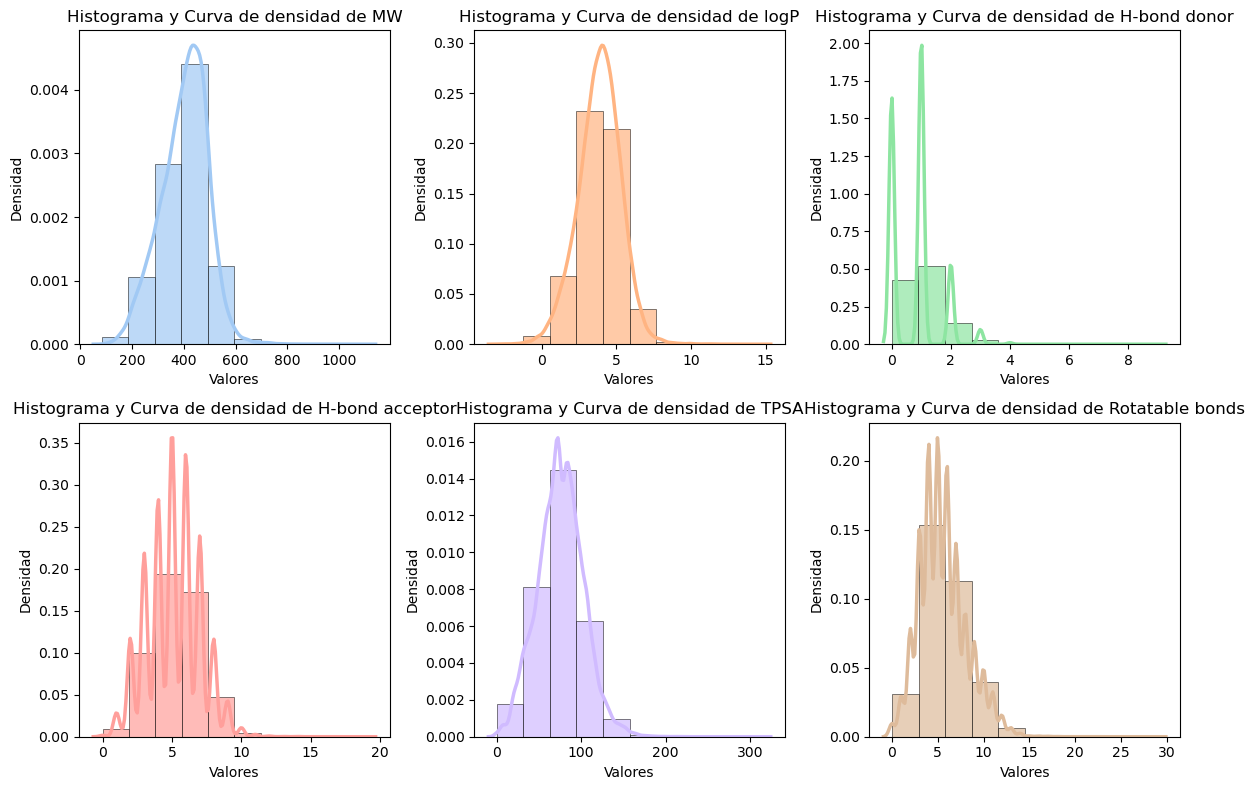

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las columnas numéricas del dataframe
columnas_numericas = df.select_dtypes(include='number').columns

# Calcular el número de filas y columnas necesarias para los subplots
num_columnas = len(columnas_numericas)
num_filas = (num_columnas + 2) // 3  # División entera redondeada hacia arriba, 3 histogramas por fila

# Crear los subplots con las dimensiones adecuadas
fig, axs = plt.subplots(num_filas, 3, figsize=(12, 4 * num_filas))

# Crear una paleta de colores pastel
colores = sns.color_palette('pastel', n_colors=num_columnas)

# Crear un histograma y trazar la curva de densidad para cada columna numérica en el subplote correspondiente
for i, columna in enumerate(columnas_numericas):
    fila = i // 3
    columna_subplot = i % 3
    axs[fila, columna_subplot].hist(df[columna], bins=10, density=True, alpha=0.7, edgecolor='black', linewidth=0.5, color=colores[i])
    sns.kdeplot(df[columna], ax=axs[fila, columna_subplot], color=colores[i], linewidth=2.5)
    axs[fila, columna_subplot].set_xlabel('Valores')
    axs[fila, columna_subplot].set_ylabel('Densidad')
    axs[fila, columna_subplot].set_title(f'Histograma y Curva de densidad de {columna}')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el conjunto de subplots
plt.show()


DESCARREGAR CHEMBL
Hem de fer un script que descarregui l'arxiu csv de chembl. 

Després descarregarem els compostos de cada target, i farem un csv conjunt. Serà el nostre train.

DESCARGAR CYSTEINE PROTEASES
de ChEMBL baixem targets:


In [4]:
import pandas as pd

# Leer el archivo CSV y cargarlo en un DataFrame
df_targets = pd.read_csv('../data/targets_cysteine_proteases_cheml.csv', sep = ";")

# Imprimir el DataFrame
print(df_targets)



         ChEMBL ID                                      Name  \
0       CHEMBL5127             Poliovirus type 1 polyprotein   
1    CHEMBL2111357                                 Calpain 1   
2    CHEMBL3351205                               Peptidase 1   
3    CHEMBL1741213               Sentrin-specific protease 7   
4       CHEMBL3147                               Calpain 1/2   
..             ...                                       ...   
124     CHEMBL2323                               Cathepsin B   
125  CHEMBL3407323  Ubiquitin carboxyl-terminal hydrolase 10   
126  CHEMBL3407317        Ubl carboxyl-terminal hydrolase 18   
127     CHEMBL3776                                 Caspase-8   
128     CHEMBL3891                                 Calpain 1   

    UniProt Accessions             Type                    Organism  \
0               P03300   SINGLE PROTEIN  Human poliovirus 1 Mahoney   
1        P04632|P07384  PROTEIN COMPLEX                Homo sapiens   
2               P1

In [5]:
targets_id = df_targets.iloc[:, 0].tolist()
print(targets_id)

['CHEMBL5127', 'CHEMBL2111357', 'CHEMBL3351205', 'CHEMBL1741213', 'CHEMBL3147', 'CHEMBL3612', 'CHEMBL1250372', 'CHEMBL2857', 'CHEMBL5801', 'CHEMBL1741221', 'CHEMBL1795087', 'CHEMBL1293295', 'CHEMBL4072', 'CHEMBL4779', 'CHEMBL1949492', 'CHEMBL2517', 'CHEMBL2069160', 'CHEMBL1909484', 'CHEMBL3559678', 'CHEMBL1075050', 'CHEMBL2157851', 'CHEMBL1075276', 'CHEMBL5832', 'CHEMBL1075277', 'CHEMBL3430905', 'CHEMBL2223', 'CHEMBL4097', 'CHEMBL4523939', 'CHEMBL3038466', 'CHEMBL5800', 'CHEMBL2157854', 'CHEMBL2205', 'CHEMBL1697672', 'CHEMBL1293227', 'CHEMBL3774301', 'CHEMBL5169181', 'CHEMBL3937', 'CHEMBL268', 'CHEMBL3563', 'CHEMBL5991', 'CHEMBL1250373', 'CHEMBL3349', 'CHEMBL3286062', 'CHEMBL3831289', 'CHEMBL3879833', 'CHEMBL4244', 'CHEMBL4295862', 'CHEMBL3407324', 'CHEMBL2954', 'CHEMBL2226', 'CHEMBL5037', 'CHEMBL2225', 'CHEMBL2034806', 'CHEMBL4295583', 'CHEMBL4742277', 'CHEMBL2176776', 'CHEMBL3232682', 'CHEMBL2111396', 'CHEMBL1697661', 'CHEMBL1250371', 'CHEMBL4620', 'CHEMBL2111441', 'CHEMBL1075185', '

Tenim la llista dels targets ID de cysteine proteases. Ara hem de extreure tots els seus lligands amb la seva activitat. 

We are using a list of known targets, and we have to find compounds that are active on these targets. 

https://gist.github.com/avrilcoghlan/531acff5f2f5860d5fc6631f549aec43

In [6]:
import pandas as pd
import requests

#join the targets into a suitable string to fulfil the search conditions for the API
targets = ",".join(targets_id)
assay_type = 'B' #only for Binding Assays
pchembl_value = 5 #Specify the minimum threshold of the pChEMBL activity value. 
limit = 100 #limit the number of records pulled back for each url call

url_stem = "https://www.ebi.ac.uk" #This is the stem of the url
url_full_string = url_stem + "/chembl/api/data/activity.json?target_chembl_id__in={}&assay_type={}&pchembl_value__gte=5&limit={}".format(targets, assay_type, limit) #This is the full url with the specified input parameters
url_full = requests.get( url_full_string ).json() #This calls the information back from the API using the 'requests' module, and converts it to json format
url_activities = url_full['activities'] #This is a list of the results for activities

#This 'while' loop iterates over several pages of records (if required), and collates the list of results
while url_full['page_meta']['next']:
    url_full = requests.get(url_stem + url_full['page_meta']['next']).json()
    url_activities = url_activities + url_full['activities'] #Add result (as a list) to previous list of results

#Convert the list of results into a Pandas dataframe:
act_df = pd.DataFrame(url_activities)

#Print out some useful information:
print("This is the url string that calls the 'Activities' API with the initial query specification:\n{}".format(url_full_string) )
print("\nThese are the available columns for the Activities API:\n{}".format(act_df.columns))

This is the url string that calls the 'Activities' API with the initial query specification:
https://www.ebi.ac.uk/chembl/api/data/activity.json?target_chembl_id__in=CHEMBL5127,CHEMBL2111357,CHEMBL3351205,CHEMBL1741213,CHEMBL3147,CHEMBL3612,CHEMBL1250372,CHEMBL2857,CHEMBL5801,CHEMBL1741221,CHEMBL1795087,CHEMBL1293295,CHEMBL4072,CHEMBL4779,CHEMBL1949492,CHEMBL2517,CHEMBL2069160,CHEMBL1909484,CHEMBL3559678,CHEMBL1075050,CHEMBL2157851,CHEMBL1075276,CHEMBL5832,CHEMBL1075277,CHEMBL3430905,CHEMBL2223,CHEMBL4097,CHEMBL4523939,CHEMBL3038466,CHEMBL5800,CHEMBL2157854,CHEMBL2205,CHEMBL1697672,CHEMBL1293227,CHEMBL3774301,CHEMBL5169181,CHEMBL3937,CHEMBL268,CHEMBL3563,CHEMBL5991,CHEMBL1250373,CHEMBL3349,CHEMBL3286062,CHEMBL3831289,CHEMBL3879833,CHEMBL4244,CHEMBL4295862,CHEMBL3407324,CHEMBL2954,CHEMBL2226,CHEMBL5037,CHEMBL2225,CHEMBL2034806,CHEMBL4295583,CHEMBL4742277,CHEMBL2176776,CHEMBL3232682,CHEMBL2111396,CHEMBL1697661,CHEMBL1250371,CHEMBL4620,CHEMBL2111441,CHEMBL1075185,CHEMBL4510,CHEMBL4751,CHE

In [7]:
#Specify which columns to keep so that the size of the dataframe becomes more manageable:
act_df = act_df[[  'target_chembl_id','target_organism', 'target_pref_name'
                 , 'parent_molecule_chembl_id','molecule_chembl_id','molecule_pref_name'
                 , 'pchembl_value', 'standard_type','standard_relation', 'standard_value', 'standard_units'
                 , 'assay_chembl_id','document_chembl_id','src_id']]
act_df

,target_chembl_id,target_organism,target_pref_name,parent_molecule_chembl_id,molecule_chembl_id,molecule_pref_name,pchembl_value,standard_type,standard_relation,standard_value,standard_units,assay_chembl_id,document_chembl_id,src_id
0,CHEMBL3563,Trypanosoma cruzi,Cruzipain,CHEMBL90512,CHEMBL90512,None,7.30,IC50,=,50.0,nM,CHEMBL660279,CHEMBL1135476,1
1,CHEMBL2857,Human rhinovirus sp.,Human rhinovirus A protease,CHEMBL99102,CHEMBL99102,None,5.47,IC50,=,3400.0,nM,CHEMBL766325,CHEMBL1131042,1
2,CHEMBL2857,Human rhinovirus sp.,Human rhinovirus A protease,CHEMBL318278,CHEMBL318278,None,5.13,IC50,=,7400.0,nM,CHEMBL766325,CHEMBL1131042,1
3,CHEMBL4800,Mus musculus,Caspase-1,CHEMBL92017,CHEMBL92017,None,5.32,IC50,=,4800.0,nM,CHEMBL659308,CHEMBL1131550,1
4,CHEMBL4620,Hepatitis C virus genotype 1a (isolate 1) (HCV),Hepatitis C virus polyprotein,CHEMBL276488,CHEMBL276488,None,5.37,IC50,=,4300.0,nM,CHEMBL857692,CHEMBL1136650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19257,CHEMBL268,Homo sapiens,Cathepsin K,CHEMBL481611,CHEMBL481611,ODANACATIB,8.77,IC50,=,1.7,nM,CHEMBL5217723,CHEMBL5214986,1
19258,CHEMBL268,Homo sapiens,Cathepsin K,CHEMBL5220424,CHEMBL5220424,None,6.01,IC50,=,974.3,nM,CHEMBL5217723,CHEMBL5214986,1
19259,CHEMBL268,Homo sapiens,Cathepsin K,CHEMBL5220960,CHEMBL5220960,None,7.21,IC50,=,61.9,nM,CHEMBL5217723,CHEMBL5214986,1
19260,CHEMBL268,Homo sapiens,Cathepsin K,CHEMBL5219348,CHEMBL5219348,None,6.63,IC50,=,235.2,nM,CHEMBL5217723,CHEMBL5214986,1


Extract the list of compounds from the previous dataframe, and call the molecule API to find their molecular properties.

In [44]:
cmpd_chembl_ids = list(set(act_df['molecule_chembl_id']))
print("There are {} compounds initially identified as active on the known targets. e.g.".format(len(cmpd_chembl_ids)))
print(cmpd_chembl_ids[0:2])
print(cmpd_chembl_ids[-2:])
len2 = len(cmpd_chembl_ids) // 80
len2 = int(len2)

chembl_ids1 = cmpd_chembl_ids[0:100]

chembl_ids1 = ",".join(chembl_ids1)
limit = 1500

url_stem = "https://www.ebi.ac.uk" #This is the stem of the url
url_full_string = url_stem + "/chembl/api/data/molecule.json?molecule_chembl_id__in={}&limit={}".format(chembl_ids1, limit) #This is the full url with the specified input parameters
#print(url_full_string)
url_full = requests.get( url_full_string, timeout = 1000 ).json() #This calls the information back from the API using the 'requests' module, and converts it to json format
url_molecules = url_full['molecules'] #This is a list of the results for activities

#This 'while' loop iterates over several pages of records (if required), and collates the list of results
while url_full['page_meta']['next']:
    url_full = requests.get(url_stem + url_full['page_meta']['next']).json()
    url_molecules = url_molecules + url_full['molecules'] #Add result (as a list) to previous list of results

#Convert the list of results into a Pandas dataframe:
mol_df = pd.DataFrame(url_molecules)
mol_df
print(mol_df['molecule_properties'])

#Print out some useful information:
#print("This is the url string that calls the 'Molecule' API with the specified query\n{}".format(url_full_string) )
#print("\nThese are the available columns for the Molecule API:\n{}".format(mol_df.columns))

#Select only relevant columns:
mol_df = mol_df[[ 'molecule_chembl_id','pref_name', 'molecule_hierarchy'
                 , 'molecule_properties', 'max_phase']]

#print(mol_df)
#And convert cells containing a dictionary to individual columns in the dataframe so that is it easier to filter!

# Molecule hierarchy: 
mol_df['parent_chembl_id'] = mol_df['molecule_hierarchy'].apply(lambda x: x['parent_chembl_id'])
#print(mol_df)

mol_df['alogp'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['alogp'])
mol_df['hba'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['hba'])
mol_df['hbd'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['hbd'])
mol_df['mw_freebase'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['mw_freebase']) #This is the mwt of the parent compound
mol_df['full_mwt'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['full_mwt']) #This is the mwt of the full compound including any salt
mol_df['num_ro5_violations'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['num_ro5_violations'])
mol_df['psa'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['psa'])
mol_df['heavy_atoms'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['heavy_atoms'])
#mol_df['ic50'] = mol_df.loc[mol_df['standard_value'].notnull(), 'standard_value']

There are 11140 compounds initially identified as active on the known targets. e.g.
['CHEMBL196990', 'CHEMBL3667402']
['CHEMBL4567870', 'CHEMBL1359190']
0     {'alogp': '2.05', 'aromatic_rings': 3, 'cx_log...
1     {'alogp': '2.02', 'aromatic_rings': 2, 'cx_log...
2     {'alogp': '2.54', 'aromatic_rings': 2, 'cx_log...
3     {'alogp': '4.20', 'aromatic_rings': 3, 'cx_log...
4     {'alogp': '4.94', 'aromatic_rings': 2, 'cx_log...
                            ...                        
95    {'alogp': '5.56', 'aromatic_rings': 3, 'cx_log...
96    {'alogp': '5.94', 'aromatic_rings': 3, 'cx_log...
97    {'alogp': '3.85', 'aromatic_rings': 4, 'cx_log...
98    {'alogp': '1.51', 'aromatic_rings': 2, 'cx_log...
99    {'alogp': '3.75', 'aromatic_rings': 2, 'cx_log...
Name: molecule_properties, Length: 100, dtype: object


## Filter the compound list based on relevant information

El nostre arxiu de compounds era massa gran, per tant fem un loop per executar el codi mica en mica, i al final ho guardem tot en un data frame que es diu: df_total

In [46]:
#First find the list of compounds that are within the act_df dataframe:
cmpd_chembl_ids = list(set(act_df['molecule_chembl_id']))
print("There are {} compounds initially identified as active on the known targets. e.g.".format(len(cmpd_chembl_ids)))
print(cmpd_chembl_ids[0:2])
print(cmpd_chembl_ids[-2:])
len2 = len(cmpd_chembl_ids) // 80
len2 = int(len2)
start = 0

df_total = pd.DataFrame()

for i in range(len(cmpd_chembl_ids)//len2):
    variable_name = "variable_" + str(i)
    globals()[variable_name] = cmpd_chembl_ids[i*len2:(i+1)*len2]

    globals()[variable_name] = ",".join(globals()[variable_name][0:])
    limit = 1500

    #Set up the call to the ChEMBL 'molecule' API
    #Remember that there is a limit to the number of records returned in any one API call (default is 20 records, maximum is 1000 records)
    #So need to iterate over several pages of records to gather all relevant information together!

    url_stem = "https://www.ebi.ac.uk" #This is the stem of the url
    url_full_string = url_stem + "/chembl/api/data/molecule.json?molecule_chembl_id__in={}&limit={}".format(globals()[variable_name], limit) #This is the full url with the specified input parameters
    #print(url_full_string)
    url_full = requests.get( url_full_string, timeout = 1000 ).json() #This calls the information back from the API using the 'requests' module, and converts it to json format
    url_molecules = url_full['molecules'] #This is a list of the results for activities

    #This 'while' loop iterates over several pages of records (if required), and collates the list of results
    while url_full['page_meta']['next']:
        url_full = requests.get(url_stem + url_full['page_meta']['next']).json()
        url_molecules = url_molecules + url_full['molecules'] #Add result (as a list) to previous list of results

    #Convert the list of results into a Pandas dataframe:
    mol_df = pd.DataFrame(url_molecules)

    #Print out some useful information:
    #print("This is the url string that calls the 'Molecule' API with the specified query\n{}".format(url_full_string) )
    #print("\nThese are the available columns for the Molecule API:\n{}".format(mol_df.columns))

    #Select only relevant columns:
    mol_df = mol_df[[ 'molecule_chembl_id','pref_name', 'molecule_hierarchy'
                 , 'molecule_properties', 'max_phase']]

    #print(mol_df)
    #And convert cells containing a dictionary to individual columns in the dataframe so that is it easier to filter!

    # Molecule hierarchy: 
    mol_df['parent_chembl_id'] = mol_df['molecule_hierarchy'].apply(lambda x: x['parent_chembl_id'])
    #print(mol_df)

    mol_df['alogp'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['alogp'])
    mol_df['hba'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['hba'])
    mol_df['hbd'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['hbd'])
    mol_df['mw_freebase'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['mw_freebase']) #This is the mwt of the parent compound
    mol_df['full_mwt'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['full_mwt']) #This is the mwt of the full compound including any salt
    mol_df['num_ro5_violations'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['num_ro5_violations'])
    mol_df['psa'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['psa'])
    mol_df['heavy_atoms'] = mol_df.loc[ mol_df['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['heavy_atoms'])
    #mol_df
    res = mol_df[ mol_df['max_phase'] == 4 ]
    res.head()

    # Agregar los resultados al dataframe acumulativo
    df_total = pd.concat([df_total, mol_df], ignore_index=True)
    
print(df_total)

    

There are 11140 compounds initially identified as active on the known targets. e.g.
['CHEMBL196990', 'CHEMBL3667402']
['CHEMBL4567870', 'CHEMBL1359190']
      molecule_chembl_id pref_name  \
0           CHEMBL268737      None   
1            CHEMBL22597      None   
2            CHEMBL30957      None   
3            CHEMBL30411      None   
4            CHEMBL48837      None   
...                  ...       ...   
11115      CHEMBL4859374      None   
11116      CHEMBL5077948      None   
11117      CHEMBL5085283      None   
11118      CHEMBL5174815      None   
11119      CHEMBL5197170      None   

                                      molecule_hierarchy  \
0      {'active_chembl_id': 'CHEMBL268737', 'molecule...   
1      {'active_chembl_id': 'CHEMBL22597', 'molecule_...   
2      {'active_chembl_id': 'CHEMBL30957', 'molecule_...   
3      {'active_chembl_id': 'CHEMBL30411', 'molecule_...   
4      {'active_chembl_id': 'CHEMBL48837', 'molecule_...   
...                           

In [47]:

df_total


,molecule_chembl_id,pref_name,molecule_hierarchy,molecule_properties,max_phase,parent_chembl_id,alogp,hba,hbd,mw_freebase,full_mwt,num_ro5_violations,psa,heavy_atoms
0,CHEMBL268737,None,"{'active_chembl_id': 'CHEMBL268737', 'molecule...","{'alogp': '2.05', 'aromatic_rings': 3, 'cx_log...",None,CHEMBL268737,2.05,7.0,2.0,591.69,591.69,1.0,131.11,42.0
1,CHEMBL22597,None,"{'active_chembl_id': 'CHEMBL22597', 'molecule_...","{'alogp': '2.02', 'aromatic_rings': 2, 'cx_log...",None,CHEMBL22597,2.02,5.0,3.0,430.43,430.43,0.0,121.80,31.0
2,CHEMBL30957,None,"{'active_chembl_id': 'CHEMBL30957', 'molecule_...","{'alogp': '2.28', 'aromatic_rings': 2, 'cx_log...",None,CHEMBL30957,2.28,5.0,3.0,439.51,439.51,0.0,105.76,32.0
3,CHEMBL30411,None,"{'active_chembl_id': 'CHEMBL30411', 'molecule_...","{'alogp': '2.54', 'aromatic_rings': 2, 'cx_log...",None,CHEMBL30411,2.54,5.0,2.0,357.36,357.36,0.0,101.93,26.0
4,CHEMBL48837,None,"{'active_chembl_id': 'CHEMBL48837', 'molecule_...","{'alogp': '4.20', 'aromatic_rings': 3, 'cx_log...",None,CHEMBL48837,4.20,6.0,2.0,530.62,530.62,1.0,110.80,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,CHEMBL4859374,None,"{'active_chembl_id': 'CHEMBL4859374', 'molecul...","{'alogp': '4.70', 'aromatic_rings': 3, 'cx_log...",None,CHEMBL4859374,4.70,7.0,2.0,491.91,491.91,0.0,86.28,34.0
11116,CHEMBL5077948,None,"{'active_chembl_id': 'CHEMBL5077948', 'molecul...","{'alogp': '2.41', 'aromatic_rings': 2, 'cx_log...",None,CHEMBL5077948,2.41,7.0,1.0,552.02,552.02,1.0,97.41,37.0
11117,CHEMBL5085283,None,"{'active_chembl_id': 'CHEMBL5085283', 'molecul...","{'alogp': '0.94', 'aromatic_rings': 2, 'cx_log...",None,CHEMBL5085283,0.94,7.0,2.0,483.55,483.55,0.0,108.41,34.0
11118,CHEMBL5174815,None,"{'active_chembl_id': 'CHEMBL5174815', 'molecul...","{'alogp': '5.48', 'aromatic_rings': 4, 'cx_log...",None,CHEMBL5174815,5.48,4.0,2.0,552.70,552.70,2.0,92.34,40.0
